## **Import dependencies**

In [3]:
import pandas as pd
df = pd.read_excel("C:/Users/kmeiermatt001/Desktop/GL_DEC22_CC.xls")

### **Clean data**

In [4]:
# Check current data
df.head()

,Transaction Code,Unnamed: 1,Period,Unnamed: 3,Effective Date,Type**,Deposit ID / Batch No / \nRef No / Payment No,Tenant / Supplier Code,Received From / Paid To,Remarks,Tax,User,Debit,Credit,Cumulative,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,i011,Rent,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,202207.0,NaN,NaN,NaT,NaN,NaN,NaN,Balance B/f,NaN,NaN,0,NaN,0.0,NaN,0.00,NaN,NaN,NaN
2,1,Vodacom - JHB Park Station,NaN,NaN,NaN,2022-07-01,1.0,1913,1.0,Vodacom - BS17908,NaN,1.0,Muhammed Dalal,NaN,0.0,NaN,22881.02,NaN,NaN,-22881.02
3,2,Commuter - Joe Gqabi Station,NaN,NaN,NaN,2022-07-01,1.0,1913,2.0,Vodacom - BS26713/103963,NaN,1.0,Muhammed Dalal,NaN,0.0,NaN,21139.46,NaN,NaN,-44020.48
4,3,Commuter - Heideveld Station,NaN,NaN,NaN,2022-07-01,1.0,1913,3.0,Vodacom - BS101759,NaN,1.0,Muhammed Dalal,NaN,0.0,NaN,19079.98,NaN,NaN,-63100.46


In [5]:
# Rename columns
df.rename(columns={"Transaction Code":"ID"}, inplace=True)
df.rename(columns={"Unnamed: 1":"Customer"}, inplace=True)
df.rename(columns={"Data":"Date"}, inplace=True)
df.rename(columns={"Unnamed: 16": "Amount"}, inplace=True)
df.rename(columns={"Type**":"Date"}, inplace=True)

# Drop irrelevant columns
df1 = df.drop(["User", "Tax", "Cumulative", "Unnamed: 19", "Debit", "Credit", "Deposit ID / Batch No / \nRef No / Payment No", "Effective Date", "Received From / Paid To", "Period", "Unnamed: 3", "Unnamed: 15", "Unnamed: 17", "Unnamed: 18", "Tenant / Supplier Code", "Deposit ID / Batch No / \nRef No / Payment No"], axis=1)

In [6]:
# Check
df1.head()

,ID,Customer,Date,Remarks,Amount
0,i011,Rent,NaT,NaN,NaN
1,NaN,NaN,NaT,Balance B/f,0.00
2,1,Vodacom - JHB Park Station,2022-07-01,Vodacom - BS17908,22881.02
3,2,Commuter - Joe Gqabi Station,2022-07-01,Vodacom - BS26713/103963,21139.46
4,3,Commuter - Heideveld Station,2022-07-01,Vodacom - BS101759,19079.98


### **Include only revenue line items**

In [7]:
# Find the row number for ID i021
row_number = df1[df1["ID"] == "i021"].index

# Check
row_number

# New dataframe with only revenue IDs
df2 = df1.iloc[:692]

In [8]:
df2['ID'].fillna(method="ffill", inplace=True)
df2['Customer'].fillna(method="ffill", inplace=True)

C:\Users\kmeiermatt001\AppData\Local\Temp\ipykernel_21944\3186726557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ID'].fillna(method="ffill", inplace=True)
C:\Users\kmeiermatt001\AppData\Local\Temp\ipykernel_21944\3186726557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Customer'].fillna(method="ffill", inplace=True)


In [9]:
# Check
df2.iloc[650:660]

,ID,Customer,Date,Remarks,Amount
650,44,MTN - Winkelspruit R/Station,2022-12-01,IHS Towers - T581/233,24146.14
651,43,MTN - Pendlebury Station,2022-12-01,MTN - T535/318,13263.78
652,48,MTN - Springfield Station,2022-12-01,MTN - T2232,13816.83
653,49,ATC South Africa,2022-12-01,ATC - 350009 - 1011 (George Goch Station),12861.71
654,49,ATC South Africa,2022-12-01,ATC - 350011 - 1013 (Ellis Park Station),16954.06
655,49,ATC South Africa,2022-12-01,ATC - 350012 - 1014 (Doornfontein Station),14907.90
656,49,ATC South Africa,2022-12-01,ATC - 350018 - 1021 (Tooronga Station),16954.07
657,49,ATC South Africa,2022-12-01,ATC - 350044 - 1060 (Denver Station),19099.82
658,49,ATC South Africa,2022-12-01,ATC - 350056 - 1075 (Wibsey Dip Station),8769.36
659,49,ATC South Africa,2022-12-01,ATC - 350122 - 1193 (Dunswart Station),14907.90


### **Split the customer name column**

In [10]:
# Only keep the part of the string that contains the customer name (strip out locations)
df2["Customer"] = df2["Customer"].str.split('-').str[0]

C:\Users\kmeiermatt001\AppData\Local\Temp\ipykernel_21944\4271030550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Customer"] = df2["Customer"].str.split('-').str[0]


In [11]:
# Check
df2.head()

,ID,Customer,Date,Remarks,Amount
0,i011,Rent,NaT,NaN,NaN
1,i011,Rent,NaT,Balance B/f,0.00
2,1,Vodacom,2022-07-01,Vodacom - BS17908,22881.02
3,2,Commuter,2022-07-01,Vodacom - BS26713/103963,21139.46
4,3,Commuter,2022-07-01,Vodacom - BS101759,19079.98


### **Drop items from date column that are empty**

In [12]:
df2.dropna(subset=["Date"], inplace=True)

C:\Users\kmeiermatt001\AppData\Local\Temp\ipykernel_21944\403781579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset=["Date"], inplace=True)


In [13]:
df2.head()

,ID,Customer,Date,Remarks,Amount
2,1,Vodacom,2022-07-01,Vodacom - BS17908,22881.02
3,2,Commuter,2022-07-01,Vodacom - BS26713/103963,21139.46
4,3,Commuter,2022-07-01,Vodacom - BS101759,19079.98
5,11,MTN,2022-07-01,MTN - T14139,5596.43
6,4,MTN,2022-07-01,MTN - T14993,7878.84


In [14]:
# Check (show all months are in one table)
df2.iloc[157:162]

,ID,Customer,Date,Remarks,Amount
159,31,Commuter,2022-07-01,Airlinks Networks,6876.63
160,87,Commuter,2022-07-01,Atlas - Hazendal ATSA1532,4500.00
163,1,Vodacom,2022-08-01,Vodacom - BS17908,22881.02
164,2,Commuter,2022-08-01,Vodacom - BS26713/103963,21139.46
165,3,Commuter,2022-08-01,Vodacom - BS101759,19079.98


In [15]:
# Check sum of revenue agrees to TB
df2.iloc[:,4].sum()

10210514.77

### **Visualise data**

In [16]:
df3 = df2.groupby("Customer").agg({"Amount":"sum"})

In [17]:
df3.head()

,Amount
Customer,
ATC South Africa,2677218.25
Admin,75000.00
Commuter,5532719.73
MTN,1645364.79
Vodacom,280212.00


In [18]:
df4 = df3.reset_index()

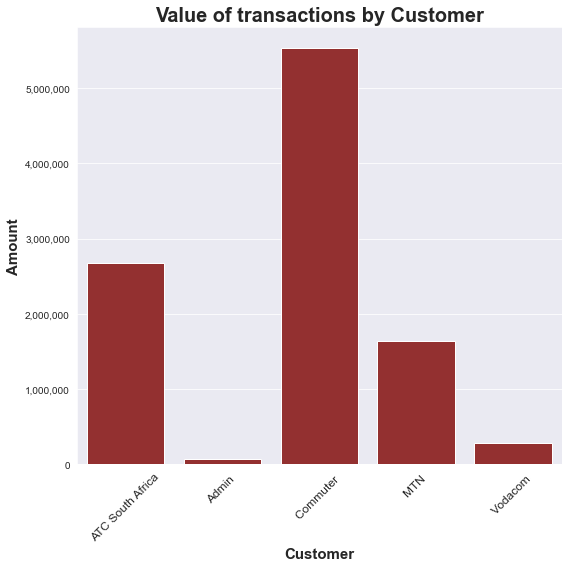

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.set_style("darkgrid")
plt.figure(figsize=(8,8))
plt.xticks(rotation=45)

sns.set_palette("husl")  # Use more subdued colors
ax = sns.barplot(x = "Customer", y ="Amount", data = df4, color='#a32020')

plt.title("Value of transactions by Customer", size = 20, fontweight='bold')
plt.xlabel("Customer", size = 15, fontweight='bold')
plt.ylabel("Amount", size = 15, fontweight='bold')
plt.xticks(size=15)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.yaxis.get_major_formatter().set_scientific(False)

formatter = ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

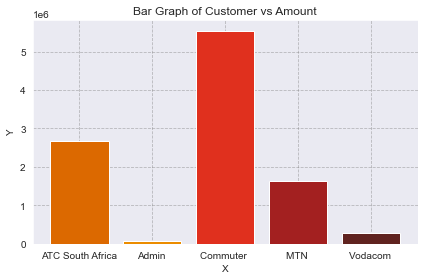

In [51]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create the bar graph
plt.bar(df4['Customer'], df4['Amount'], color=['#dc6900', '#eb8c00', '#e0301e', '#a32020', '#602320'])

# Add title and labels
plt.title('Bar Graph of Customer vs Amount')
plt.xlabel('X')
plt.ylabel('Y')

# Show grid and tighten layout
plt.grid(True, linestyle='--', color='gray', alpha=0.5)
plt.tight_layout()

# Show plot
plt.show()